In [1]:
import nltk 
from nltk.stem.porter import *

In [2]:
import pymorphy2

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Будем решать задачу сентимент-анализа. В архиве data/sentiment analisys.zip лежит несколько эксель файлов с твитами разных пользователей на разных языках (один файл - один язык).
##### Нужно выбрать один из файлов и провести над ним работу.

возьмём файл по Бирюлёво

In [12]:
df_B = pd.read_excel('data/birulevo sentiment coded.xlsx')
df_B

,user,tweet,SENTIMENT,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,1.0,POSITIVE
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,NaN,2.0,NEUTRAL
2,White_technolog,у районной управы собираются местные жители #б...,2,NaN,3.0,NEGATIVE
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,NaN,NaN,NaN
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,NaN,NaN,NaN
...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,NaN,NaN,NaN
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,NaN,NaN,NaN
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,NaN,NaN,NaN
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,NaN,NaN,NaN


удалим лишнее

In [15]:
df_B = df_B[['user','tweet','SENTIMENT']].dropna()
df_B

,user,tweet,SENTIMENT
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1
2,White_technolog,у районной управы собираются местные жители #б...,2
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3
...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2


### easy  
##### оценить сбалансированность классов  
##### удалить пунктуацию из датасета  
##### преобразовать датасет в BOW или TF-IDF, поделить на треин-тест и спрогнозировать вашей любимой моделью

**оценка сбалансированности классов**

In [33]:
df_B.loc[df_B['SENTIMENT']==1, 'sent_w'] = 'positive'
df_B.loc[df_B['SENTIMENT']==2, 'sent_w'] = 'neutral'
df_B.loc[df_B['SENTIMENT']==3, 'sent_w'] = 'negative'
df_B

,user,tweet,SENTIMENT,sent_w
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative
...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral


<AxesSubplot:>

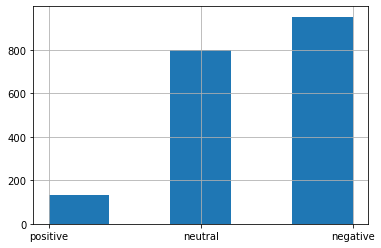

In [38]:
df_B.sent_w.hist(bins=5)

**сбалансированности нет: больше всего негативных сообщений, позитивных совсем мало**

**удаление пунктуации**

In [49]:
import re

In [106]:
for i in range(len(df_B)):
    a = str(df_B.iloc[i,1])
    b = re.sub(r'[^\w\s]','', a)
    df_B.loc[df_B.index==(i+1), 'tweet_bz'] = b
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...
...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...


**преобразование датасета в TF-IDF**

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [159]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df_B.tweet_bz)

**разделение на train и test**

In [160]:
df_B['sent_w'] = pd.Categorical(df_B['sent_w'])
df_B['sent_code'] = df_B.sent_w.cat.codes
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz,sent_code
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...,2
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...,1
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...,1
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...,0
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...,0
...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево,1
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...,1
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...,0
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...,1


In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, df_B.sent_code, train_size=0.8)

**прогнозирование**

In [176]:
from sklearn.linear_model import SGDRegressor,LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [190]:
model = SGDRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score(y_pred, y_test)

-57.563346725315085

In [189]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)
r2_score(y_pred, y_test)
print(accuracy_score(y_pred, y_test), r2_score(y_pred, y_test))

0.6825396825396826 -1.0969870875179333


In [184]:
confusion_matrix(y_test, y_pred)

array([[164,  23,   0],
       [ 73,  94,   0],
       [ 18,   6,   0]], dtype=int64)

In [191]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2_score(y_pred, y_test)

-1.1787375504580484

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)
r2_score(y_pred, y_test)
print(accuracy_score(y_pred, y_test), r2_score(y_pred, y_test))

0.6746031746031746 -0.9997060984570165


In [194]:
confusion_matrix(y_test, y_pred)

array([[168,  18,   1],
       [ 82,  84,   1],
       [ 18,   3,   3]], dtype=int64)

### normal  
##### удалить стоп-слова из датасета, использовать стеммер Портера (лежит в src/porter.py)  
##### использовать пайплайн для TF-IDF и модели машинного обучения  
##### подобрать параметры, сравнить качество нескольких моделей

**удаление стоп-слов, стеммер Портера**

In [211]:
import nltk 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
Porter = PorterStemmer()

In [204]:
for i in range(len(df_B)):
    ast = str(df_B.iloc[i,4])
    bst = Porter.stem(ast)
    df_B.loc[df_B.index==(i+1), 'tweet_stem'] = bst
    #df_B.loc[df_B.index==(i+1), 'tweet_stem'] = Porter.stem(str(df_B.iloc[i,4]))
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz,sent_code,tweet_stem
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...,2,в вост бирюлево на одну палатку с кошатиной ст...
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...,1,у районной управы собираются местные жители би...
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...,1,tvrain тем временем конная полиция добралась д...
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...,0,в центре появились тощие прыщавые мужичонки с ...
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...,0,как пишет товарищ в смс на площади революции ч...
...,...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево,1,наш корр dmitryhorse ведет трансляцию из бирюлево
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...,1,gazetaru мид ответил на заявление германии о б...
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...,0,rt_russian азербайджанские радикалы пригрозили...
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...,1,rt_russian эксклюзив новые кадры задержания по...


так как Porter плохо работает с русским языком, изменений после применения стемминга, кажется, нет

**пайплайн для TF-IDF и модели машинного обучения**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [335]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", LogisticRegression()),
    ]
)

In [336]:
pipeline.fit(df_B['tweet_stem'], df_B['sent_code'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [337]:
df_B['tweet_stem'].iloc[250:255]

251    скоро в эфире магомед толбоев почетный президе...
252    в бирюлево продолжаются задержания  lifenews p...
253    полиция проводит масштабные проверки в районе ...
254    после погромов в бирюлево под стражей остаются...
255    срочно 1200 человек задержаны в западном бирюл...
Name: tweet_stem, dtype: object

In [338]:
df_B['sent_code'].iloc[250:255]

251    1
252    0
253    1
254    1
255    0
Name: sent_code, dtype: int8

In [339]:
pipeline.predict(df_B['tweet_stem'].iloc[250:255])

array([1, 0, 1, 1, 1], dtype=int8)

на этой маленькой выборке попадание 4 из 5

In [340]:
accuracy_score(pipeline.predict(df_B['tweet_stem']), df_B['sent_code'])

0.9058201058201059

**подбор параметров**

In [249]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [291]:
x = df_B.tweet_stem
y = df_B.sent_code
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [292]:
params = {
    'vect__max_df' : [0.3, 0.5, 1],
    'vect__min_df' : [0.1, 0.3, 0.7],
    'vect__max_features': [2, 3, 5],
    'tfidf__norm': ['l1', 'l2'],
    'tfidf__sublinear_tf': ['True', 'False'],
    'clf__penalty': ['none', 'l2'],
    'clf__max_iter': [50, 100, 150]
}

pip_search = RandomizedSearchCV(pipeline, params, scoring='accuracy')
pip_search.fit(x_train, y_train)

C:\Users\79216\anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\79216\anaconda3\envs\py38\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\79216\anaconda3\envs\py38\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\79216\anaconda3\envs\py38\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_on

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('clf', LogisticRegression())]),
                   param_distributions={'clf__max_iter': [50, 100, 150],
                                        'clf__penalty': ['none', 'l2'],
                                        'tfidf__norm': ['l1', 'l2'],
                                        'tfidf__sublinear_tf': ['True',
                                                                'False'],
                                        'vect__max_df': [0.3, 0.5, 1],
                                        'vect__max_features': [2, 3, 5],
                                        'vect__min_df': [0.1, 0.3, 0.7]},
                   scoring='accuracy')

In [293]:
pip_search.best_estimator_

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=5, min_df=0.1)),
                ('tfidf', TfidfTransformer(norm='l1', sublinear_tf='False')),
                ('clf', LogisticRegression(max_iter=150, penalty='none'))])

In [342]:
pipeline = Pipeline(
    [
        ("vect", CountVectorizer(max_df=0.5, max_features=5, min_df=0.1)),
        ("tfidf", TfidfTransformer(norm='l1', sublinear_tf='False')),
        ("clf", LogisticRegression(max_iter=150, penalty='none')),
    ]
)

In [343]:
pipeline.fit(df_B['tweet_stem'], df_B['sent_code'])

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=5, min_df=0.1)),
                ('tfidf', TfidfTransformer(norm='l1', sublinear_tf='False')),
                ('clf', LogisticRegression(max_iter=150, penalty='none'))])

In [344]:
df_B['tweet_stem'].iloc[250:255]

251    скоро в эфире магомед толбоев почетный президе...
252    в бирюлево продолжаются задержания  lifenews p...
253    полиция проводит масштабные проверки в районе ...
254    после погромов в бирюлево под стражей остаются...
255    срочно 1200 человек задержаны в западном бирюл...
Name: tweet_stem, dtype: object

In [345]:
df_B['sent_code'].iloc[250:255]

251    1
252    0
253    1
254    1
255    0
Name: sent_code, dtype: int8

In [346]:
pipeline.predict(df_B['tweet_stem'].iloc[250:255])

array([0, 0, 0, 0, 0], dtype=int8)

In [347]:
accuracy_score(pipeline.predict(df_B['tweet_stem']), df_B['sent_code'])

0.5037037037037037

после подбора параметров качество стало хуже (видимо, потому что параметры взяты минимальные, ниже параметров по умолчанию)

**сравнение с другой моделью**

In [348]:
pipeline2 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf2", RandomForestClassifier()),
    ]
)

In [349]:
pipeline2.fit(df_B['tweet_stem'], df_B['sent_code'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf2', RandomForestClassifier())])

In [350]:
pipeline2.predict(df_B['tweet_stem'].iloc[250:255])

array([1, 0, 1, 1, 0], dtype=int8)

у RandomForestClassifier на этой маленькой выборке попадание 5/5

In [351]:
accuracy_score(pipeline2.predict(df_B['tweet_stem']), df_B['sent_code'])

0.9957671957671957

### hard  
##### использовать лемматизатор pymorphy вместо стемминга  
##### в качестве модели использовать градиентный бустинг не из sklearn  
##### подобрать параметры, оценить качество на кросс-валидации

**лемматизатор pymorphy**

In [306]:
import pymorphy2

In [307]:
morph = pymorphy2.MorphAnalyzer()

In [310]:
def lemmatize_word(word):
    return morph.parse(word)[0].normal_form

def preprocess_corpus_lem(corpus):
    return [' '.join(map(lemmatize_word, text.split())) for text in corpus]

In [313]:
df_B['tweet_lem'] = preprocess_corpus_lem(df_B['tweet_bz'])
df_B

,user,tweet,SENTIMENT,sent_w,tweet_bz,sent_code,tweet_stem,tweet_lem
1,BorisALV,в вост. #бирюлево на одну палатку с кошатиной ...,1,positive,в вост бирюлево на одну палатку с кошатиной ст...,2,в вост бирюлево на одну палатку с кошатиной ст...,в вост бирюлёво на один палатка с кошатина ста...
2,White_technolog,у районной управы собираются местные жители #б...,2,neutral,у районной управы собираются местные жители би...,1,у районной управы собираются местные жители би...,у районный управа собираться местный житель би...
3,White_technolog,“@tvrain: тем временем конная полиция добралас...,2,neutral,tvrain тем временем конная полиция добралась д...,1,tvrain тем временем конная полиция добралась д...,tvrain тем время конный полиция добраться до б...
4,White_technolog,в центре появились тощие прыщавые мужичонки с ...,3,negative,в центре появились тощие прыщавые мужичонки с ...,0,в центре появились тощие прыщавые мужичонки с ...,в центр появиться тощий прыщавый мужичонка с к...
5,White_technolog,"как пишет товарищ в смс, на площади революции ...",3,negative,как пишет товарищ в смс на площади революции ч...,0,как пишет товарищ в смс на площади революции ч...,как писать товарищ в смс на площадь революция ...
...,...,...,...,...,...,...,...,...
1886,GraniTweet,наш корр @dmitryhorse ведет трансляцию из #бир...,2,neutral,наш корр dmitryhorse ведет трансляцию из бирюлево,1,наш корр dmitryhorse ведет трансляцию из бирюлево,наш корра dmitryhorse вести трансляция из бирю...
1887,Fkontakte,“@gazetaru: #мид ответил на заявление германии...,2,neutral,gazetaru мид ответил на заявление германии о б...,1,gazetaru мид ответил на заявление германии о б...,gazetaru мид ответить на заявление германия о ...
1888,Fkontakte,“@rt_russian: #азербайджан'ские радикалы пригр...,3,negative,rt_russian азербайджанские радикалы пригрозили...,0,rt_russian азербайджанские радикалы пригрозили...,rt_russian азербайджанский радикал пригрозить ...
1889,Fkontakte,“@rt_russian: эксклюзив: новые кадры задержани...,2,neutral,rt_russian эксклюзив новые кадры задержания по...,1,rt_russian эксклюзив новые кадры задержания по...,rt_russian эксклюзив новый кадр задержание под...


**градиентный бустинг**

In [314]:
import xgboost as xgb

In [316]:
from xgboost import XGBClassifier

In [320]:
x = tfidf.fit_transform(df_B.tweet_lem)
y = df_B.sent_code
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [321]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

[19:07:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6640211640211641

**подбор параметров**

In [324]:
params = {
    'n_estimators': [50, 100, 200],
    'n_jobs': [2,3,4],
    'booster': ['gbtree', 'gblinear', 'dart']
}

xgb_search = RandomizedSearchCV(XGBClassifier(), params, scoring='accuracy')
xgb_search.fit(x_train, y_train)


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:51] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:16:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:21] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:17:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [325]:
xgb_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [329]:
model3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0, max_depth=6, min_child_weight=1, monotone_constraints='()', n_estimators=100, n_jobs=2, num_parallel_tree=1, objective='multi:softprob', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method='exact', validate_parameters=1, verbosity=None)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
accuracy_score(y_pred, y_test)

C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:24:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6640211640211641

качество не изменилось

**кросс-валидация**

In [332]:
accuracy = accuracy_score(y_pred, y_test)
cr_val_xgb = cross_val_score(model3, x_train, y_train, error_score=accuracy)

C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\79216\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [333]:
print('кросс-валидация на train выборке:',cr_val_xgb)
print('cреднее по кросс-валидации:', cr_val_xgb.mean())

кросс-валидация на train выборке: [0.66666667 0.71287129 0.6589404  0.64238411 0.68211921]
cреднее по кросс-валидации: 0.6725963324809302


на кросс-валидации улучшение незначительное

**получается, самое высокое качество (99,5%) у Pipeline (CountVectorizer + TfidfTransformer + RandomForestClassifier)**